# 1 Importing dependencies and Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Importing the data recorded from the pressure ports

In [3]:
pressures = pd.read_csv('raw_testG41.csv')
pressures.columns

Index(['  Run_nr', '    Time', '   Alpha', 'Delta_Pb', '   P_bar', '       T',
       '     rpm', '     rho', '    P001', '    P002',
       ...
       '    P104', '    P105', '    P106', '    P107', '    P108', '    P109',
       '    P110', '    P111', '    P112', '    P113'],
      dtype='object', length=121)

In [4]:
pressures.dtypes

  Run_nr    object
    Time    object
   Alpha    object
Delta_Pb    object
   P_bar    object
             ...  
    P109    object
    P110    object
    P111    object
    P112    object
    P113    object
Length: 121, dtype: object

Importing the coordinates of each static port on the airfoil

In [5]:
airfoil_ports = pd.read_csv('airfoil_coordinates.csv')
airfoil_ports.columns
airfoil_ports

,Port Name,x,y
0,P001,0.00000,0.00000
1,P002,0.35626,0.77154
2,P003,1.33331,1.60115
3,P004,3.66108,2.87759
4,P005,7.29220,4.15707
5,P006,11.35604,5.13022
6,P007,15.59135,5.85007
7,P008,19.91328,6.37480
8,P009,24.28443,6.74148
9,P010,28.68627,6.97480


## Processing to floats

In [6]:
pressures = pressures.drop(labels=0)

In [7]:
pressures.columns = pressures.columns.str.strip(' ')
pressures.columns

Index(['Run_nr', 'Time', 'Alpha', 'Delta_Pb', 'P_bar', 'T', 'rpm', 'rho',
       'P001', 'P002',
       ...
       'P104', 'P105', 'P106', 'P107', 'P108', 'P109', 'P110', 'P111', 'P112',
       'P113'],
      dtype='object', length=121)

In [8]:
pressures = pressures.drop(labels= ['Time', 'Run_nr'], axis=1)

In [9]:
pressures = pressures.astype(float)

## Graphing Pressure distribution over the airfoil

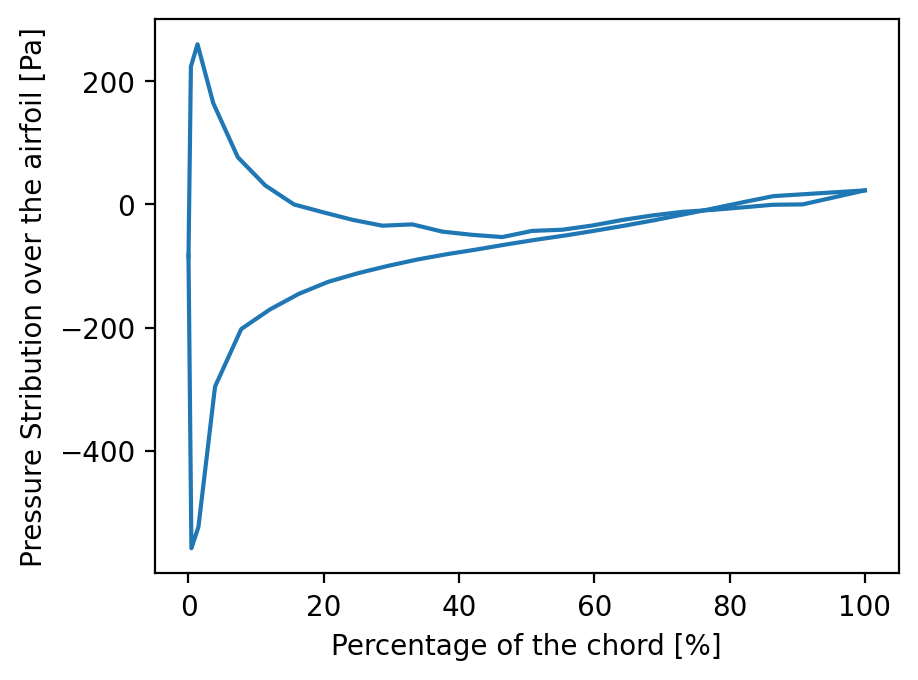

In [10]:
plt.plot(airfoil_ports['x'][0:25], pressures.iloc[1]['P001':'P025'], color= 'tab:blue')
plt.plot(airfoil_ports['x'][25:49], pressures.iloc[1]['P026':'P049'], color= 'tab:blue')
plt.xlabel('Percentage of the chord [%]')
plt.ylabel('Pressure Stribution over the airfoil [Pa]')
plt.show()

## Seslect a specific angle of attack

In [18]:
# here insert your angle of attack
aoa = 10

In [19]:
if aoa in pressures['Alpha'].values:
    current = pressures[pressures['Alpha'] == aoa]
else: 
    raise Exception('This angle of attack was not measured during the test or the number is inserted incorrectly')

### Plotting the pressure distributions

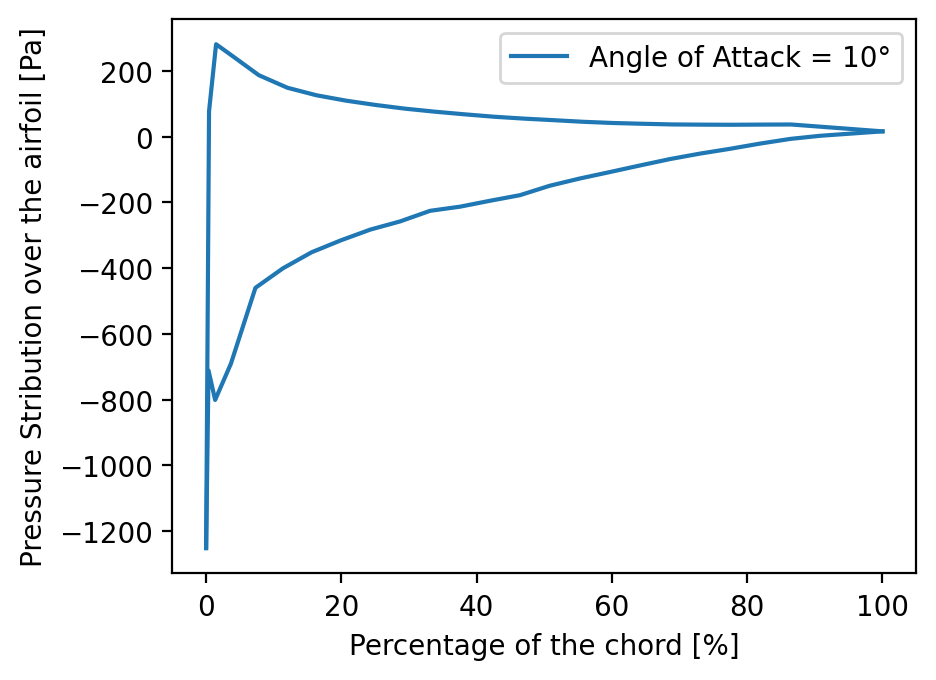

In [20]:
plt.plot(airfoil_ports['x'][0:25], current.iloc[0]['P001':'P025'], color= 'tab:blue', label=f'Angle of Attack = {aoa}°')
plt.plot(airfoil_ports['x'][25:49], current.iloc[0]['P026':'P049'], color= 'tab:blue')
plt.xlabel('Percentage of the chord [%]')
plt.ylabel('Pressure Stribution over the airfoil [Pa]')
plt.legend()
plt.show()

## Transform the curve from pressure distribution to dimensionless coefficient $C_p \: [-]$

In [21]:
# find p inf from previous
# p static now from "current" dataframe 

# NOTE for now i will use p110 as it is a static pressure port at the wall of the test section. However, it is not an accurate measurement so it should be replaced p soon by something in the settling chamber

# rho, which rho do i use? I am taking the one from the dataframe for now, take into consideration whether to use the one in there or calculate it assuming calorically perfect gas or with some other method

# equivalently dynamic pressure should be used, what is P_b / delta Pb

In [22]:
# assuming at infinity velocity is 21 m/s use the static measurement in the settling chamber (would be ideal)
p_inf = current.iloc[0]['P_bar']*10**2

rho = current.iloc[0]['rho']

u = 21 # m/s

q_inf = 0.5*rho*(u)**2

In [27]:
cp_distributions = (current.iloc[0]['P001':'P049'] - p_inf)/q_inf
cp_distributions, p_inf, q_inf

(P001   -387.372134
 P002   -385.354796
 P003   -385.688792
 P004   -385.277642
 P005   -384.415852
 P006   -384.194545
 P007   -384.012504
 P008   -383.877196
 P009   -383.754654
 P010   -383.661973
 P011   -383.541819
 P012   -383.494863
 P013   -383.427900
 P014   -383.364407
 P015   -383.256982
 P016   -383.174864
 P017   -383.101705
 P018   -383.027127
 P019   -382.954378
 P020   -382.892304
 P021   -382.837584
 P022   -382.778198
 P023   -382.725306
 P024   -382.689884
 P025   -382.639754
 P026   -387.364146
 P027   -382.411840
 P028   -381.650906
 P029   -381.786176
 P030   -382.002333
 P031   -382.144695
 P032   -382.230322
 P033   -382.291015
 P034   -382.340024
 P035   -382.382203
 P036   -382.416319
 P037   -382.446255
 P038   -382.473802
 P039   -382.495003
 P040   -382.512696
 P041   -382.531060
 P042   -382.544796
 P043   -382.553568
 P044   -382.561182
 P045   -382.563683
 P046   -382.564990
 P047   -382.563086
 P048   -382.561780
 P049   -382.639754
 Name: 18, dtype: fl

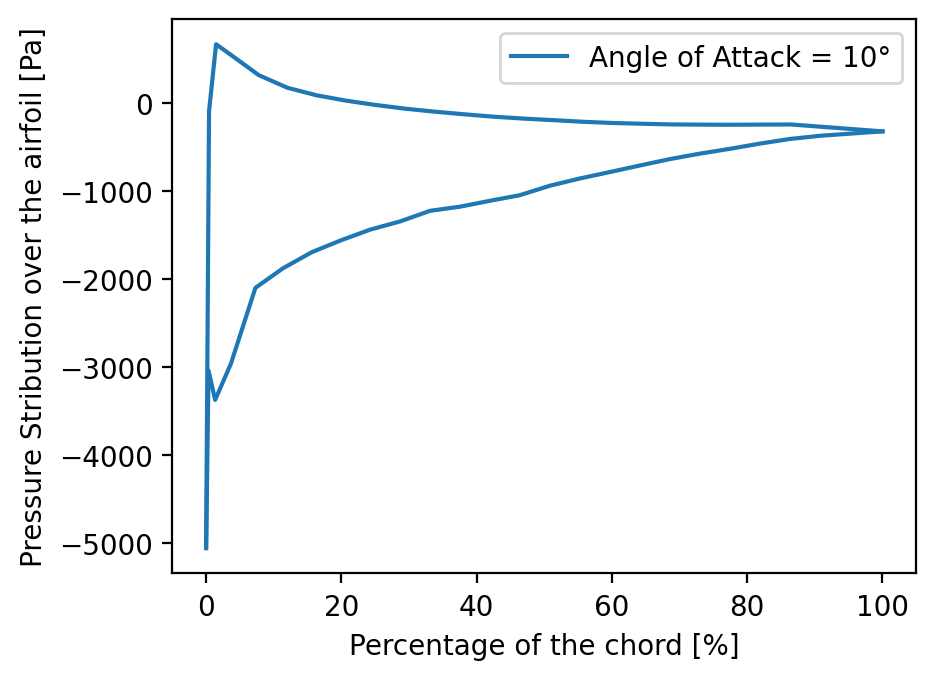

In [24]:
plt.plot(airfoil_ports['x'][0:25], cp_distributions['P001':'P025'], color= 'tab:blue', label=f'Angle of Attack = {aoa}°')
plt.plot(airfoil_ports['x'][25:49], cp_distributions['P026':'P049'], color= 'tab:blue')
plt.xlabel('Percentage of the chord [%]')
plt.ylabel('Pressure Stribution over the airfoil [Pa]')
plt.legend()
plt.show()